# Applied Data Science Specialisation Capstone

##### This notebook is for the Applied Data Science Capstone course project . ( Part of the IBM Data Science Professional Certification )

## The Battle of Neighbourhoods - Neighbourhoods Segmentation and Clustering

In this project, given a city like the City of Toronto, we will segment it into different neighbourhoods using the geographical coordinates of the centre of each neighbourhood. Then, using a combination of location data and machine learning, we will group the neighbourhoods into clusters.

#### Import all the libraries required.

In [98]:
# library for data manipulations and analyses
import pandas as pd

# customize row/clumn display aspects
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# library for similar manipulation making use of vectors
import numpy as np

# library for HTTP reuests
import requests

# library for parsing HTML data
from bs4 import BeautifulSoup

# library for converting address into latitude and longitude values
from geopy.geocoders import Nominatim

# library for map rendering
!pip install folium
import folium

# cdist for determining optimal K in K Means clustering
from scipy.spatial.distance import cdist

# sklearn's KMeans for clustering
from sklearn.cluster import KMeans

# library for colors on maps
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [2]:
# test cell (ignore this cell)
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


## Submission: Part 1

#### Get Wikipedia page's HTML into the notebook using GET requests.

In [3]:
# define webpage for scraping
webpage_URL = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

# send the GET requests and examine results
page = requests.get(webpage_URL)

#### Wrangle required information into a pandas dataframe using Beautiful Soup.

In [4]:
# define Beutiful Soup object
soup = BeautifulSoup(page.content, 'html.parser')

# extract table HTML from page content
table = soup.find('table')

# 'table_rows' stores data for all postal codes in list of lists format
table_rows = []

# extract and clean text in td tags for postal code, borough and neighbourhood information
for row in table.findAll('td'):
    # 'case' to store processed row in each iteration
    case = {}
    
    # do not process 'Not assigned' cells on Wikipedia page
    if row.span.text == 'Not assigned':
        pass
    else:
        # first 3 characters from text under p tag go for postal code
        case['PostalCode'] = row.p.text[:3]
        
        # first '(' split element from text under span tag go for borough
        case['Borough'] = (row.span.text).split('(')[0]
        
        # second split + more cleaning go for neighbourhood
        case['Neighbourhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        
        # append the processed row
        table_rows.append(case)

# create a daatframe for to list of lists containing neighbourhood data
toronto_data = pd.DataFrame(table_rows)

# rename borough names for uniformity
toronto_data['Borough'] = toronto_data['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                                                       'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                                                       'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                                                       'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [5]:
# check shape of final dataframe
toronto_data.shape

(103, 3)

## Submission: Part 2

#### Add latitude and longitude coordinates information this neighbourhood data using the 'GeoSpatial Dataset'.

In [6]:
# NOTE: The data has been uploaded to the GitHub repository and the raw version of it being used directly form there.

# data file URL form GitHub
data_URL = 'https://raw.githubusercontent.com/guptasaumya/coursera-capstone/master/Geospatial_Coordinates.csv'

# load data into pandas dataframe
geocoordinate_data = pd.read_csv(data_URL)

#### Merge data into geocoordinates data to neighbourhood data.

In [7]:
# merge and drop the duplicate column
toronto_data = toronto_data.merge(geocoordinate_data, left_on='PostalCode', right_on='Postal Code').drop(['Postal Code'], axis=1)
toronto_data

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


## Submission: Part 3

In [8]:
toronto_data.Borough.unique()

array(['North York', 'Downtown Toronto', "Queen's Park", 'Etobicoke',
       'Scarborough', 'East York', 'York', 'East Toronto', 'West Toronto',
       'East York/East Toronto', 'Central Toronto', 'Mississauga',
       'Downtown Toronto Stn A', 'Etobicoke Northwest',
       'East Toronto Business'], dtype=object)

In [9]:
# use geopy library to get latitude and longitude values of city of Toronto
address = 'Toronto, Ontario, Canada'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighbourhood in zip(toronto_data['Latitude'],
                                            toronto_data['Longitude'],
                                            toronto_data['Borough'],
                                            toronto_data['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)

map_toronto

#### Define Foursquare API usage credentials and version.

In [117]:
# The code was removed by Watson Studio for sharing.

In [11]:
# define function gets nearby venues for each neighbourhood
def getNearbyVenues(names, latitudes, longitudes, radius=500):

    # 'venues_list' stores venues data for all postal codes in list of lists format
    venues_list = []
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        
        print(name)

        # create API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            radius,
            LIMIT)

        # send GET requests and examine results
        response = requests.get(url).json()["response"]['groups'][0]['items']

        # append only relevant information for each nearby venue
        venues_list.append([(
            name,
            lat,
            lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in response])

    # create a dataframe from list of lists containing neighbourhood data
    nearby_venues = pd.DataFrame([item for venue_list in venues_list
                                  for item in venue_list])
    
    # rename columns for uniform column name format
    nearby_venues.columns = ['Neighbourhood',
                             'NeighbourhoodLatitude',
                             'NeighbourhoodLongitude',
                             'Venue',
                             'VenueLatitude',
                             'VenueLongitude',
                             'VenueCategory']

    # return resulting dataframe
    return(nearby_venues)

In [37]:
# define function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]

#### In this solution, I am working with all 103 postal codes and not just the ones with the 'Toronto' substring.

In [13]:
# call the function the get nearby venues for each neighbourhood
toronto_venues = getNearbyVenues(toronto_data['Neighbourhood'],
                                 toronto_data['Latitude'],
                                 toronto_data['Longitude'],
                                 # finding neraby venues within 500 meter radius
                                 500)

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Ontario Provincial Government
Islington Avenue
Malvern, Rouge
Don Mills North
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
The Danforth  East
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmount Park
Bayview Village
Downsview East
The Danforth

In [35]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['VenueCategory']],
                                  prefix="",
                                  prefix_sep="")

# add Neighbourhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

# move Neighbourhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()

In [108]:
# we will look into top 10 most common venue categories
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :],
                                                                          num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Lounge,Breakfast Spot,Latin American Restaurant,Dumpling Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Electronics Store
1,"Alderwood, Long Branch",Pizza Place,Gym,Pub,Sandwich Place,Dance Studio,Coffee Shop,Discount Store,Distribution Center,Dog Run,Doner Restaurant
2,"Bathurst Manor, Wilson Heights, Downsview North",Bank,Coffee Shop,Fried Chicken Joint,Sandwich Place,Diner,Restaurant,Deli / Bodega,Middle Eastern Restaurant,Mobile Phone Shop,Supermarket
3,Bayview Village,Café,Bank,Chinese Restaurant,Japanese Restaurant,Yoga Studio,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore
4,"Bedford Park, Lawrence Manor East",Italian Restaurant,Sandwich Place,Coffee Shop,Sushi Restaurant,Hobby Shop,Restaurant,Pub,Café,Butcher,Juice Bar


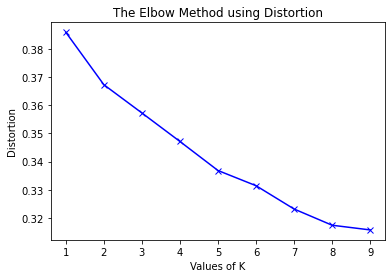

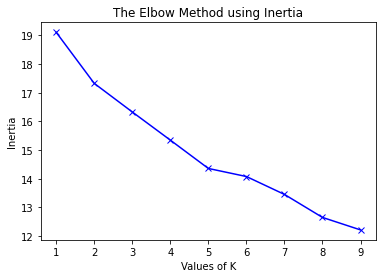

In [109]:
# find optimal k checking both distortions and inertias with reduced data
distortions = []
inertias = []
K = range(1, 10)

for k in K:
    kmeans_model = KMeans(n_clusters = k, random_state=0)
    kmeans_model.fit(toronto_grouped_clustering)
 
    distortions.append(sum(np.min(cdist(toronto_grouped_clustering, kmeans_model.cluster_centers_,
                                        'euclidean'), axis = 1)) / toronto_grouped_clustering.shape[0])
    inertias.append(kmeans_model.inertia_)
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

#### 5 number of clusters seems to be the elbow and hence a good K-value.

In [110]:
# fit kmeans model with 5 clusters - optimal value of k
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters,
                random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2], dtype=int32)

In [111]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'ClusterLabels', kmeans.labels_)

toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighbourhood
toronto_merged = toronto_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'),
                                     on='Neighbourhood', how='right')

# check the last columns!
toronto_merged.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,1,Fast Food Restaurant,Park,Food & Drink Shop,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Dim Sum Restaurant,Dumpling Restaurant
1,M4A,North York,Victoria Village,43.725882,-79.315572,1,Portuguese Restaurant,French Restaurant,Pizza Place,Coffee Shop,Hockey Arena,Intersection,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1,Coffee Shop,Park,Pub,Bakery,Theater,Breakfast Spot,Restaurant,Café,French Restaurant,Beer Store
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0,Clothing Store,Accessories Store,Gift Shop,Furniture / Home Store,Athletics & Sports,Coffee Shop,Carpet Store,Boutique,Vietnamese Restaurant,Diner
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,1,Coffee Shop,Sushi Restaurant,Café,Diner,College Cafeteria,Beer Bar,Spa,Smoothie Shop,Sandwich Place,Burrito Place


In [112]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'],
                                  toronto_merged['Longitude'],
                                  toronto_merged['Neighbourhood'],
                                  toronto_merged['ClusterLabels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster),
                         parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

In [113]:
toronto_merged.ClusterLabels.value_counts()

1    88
2     4
4     2
7     1
6     1
5     1
3     1
0     1
Name: ClusterLabels, dtype: int64

In [71]:
toronto_data

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
